In [1]:
import torch.nn          as nn
import torch.optim       as optim
import numpy             as np
import matplotlib.pyplot as plt
import torch

from libraries.graph         import POSCAR_graph_encoding, graph_POSCAR_encoding
from libraries.model         import get_random_graph, diffuse
from os                      import path, listdir
from torch.utils.data        import random_split
from torch_geometric.data    import Data, Batch
from pymatgen.core.structure import Structure

# Checking if pytorch can run in GPU, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Machine-learning parameters
n_epochs      = 1000
batch_size    = 128
learning_rate = 0.0001

# Number of diffusing and denoising steps
n_t_steps = 10

# Decay of parameter alpha
noise_contribution = 0.05
alpha_decay = 0.5 * (1 - noise_contribution**2)

# Dropouts for node and edge models (independent of each other)
dropout_node = 0.2
dropout_edge = 0.2

# Diffusion

In [3]:
#graph = get_random_graph(5, 1)

temp_structure = Structure.from_file('POSCAR')

nodes, edges, attributes = graph_POSCAR_encoding(temp_structure)

# Construct temporal graph structure
graph = Data(x=nodes,
             edge_index=edges.t().contiguous(),
             edge_attr=attributes.ravel(),
             y=torch.tensor([0], dtype=torch.float)             
             )

graph.x         = torch.abs(graph.x)
graph.edge_attr = torch.abs(graph.edge_attr)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

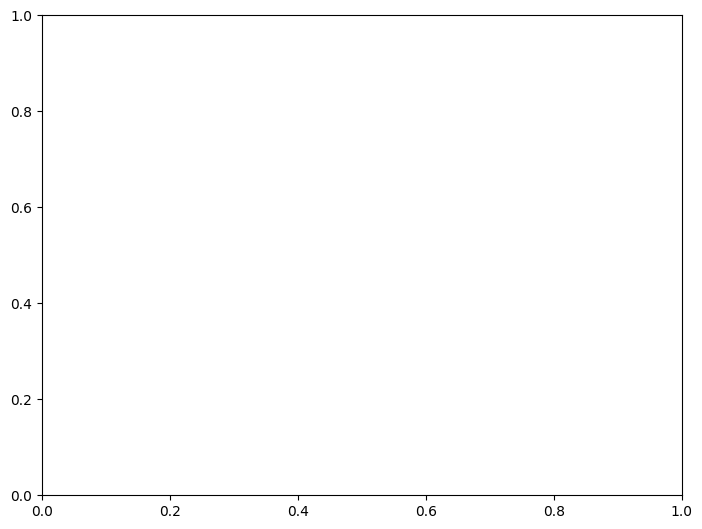

In [4]:
batch_t = Batch.from_data_list([graph]).to(device)


diffused_grap = diffuse(batch_t, n_t_steps,
                        s=alpha_decay, plot_steps=True)

In [6]:
# Extract features and attributes from each graph
all_xs    = []
all_attrs = []
for graph in all_graphs:
    all_xs.append(graph.x)
    all_attrs.append(graph.edge_attr)

# Each row corresponds to a different feature/edge
all_xs_concat    = torch.hstack(all_xs)
all_attrs_concat = torch.vstack(all_attrs).T

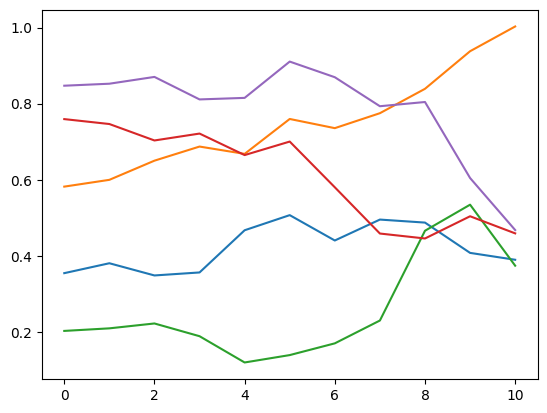

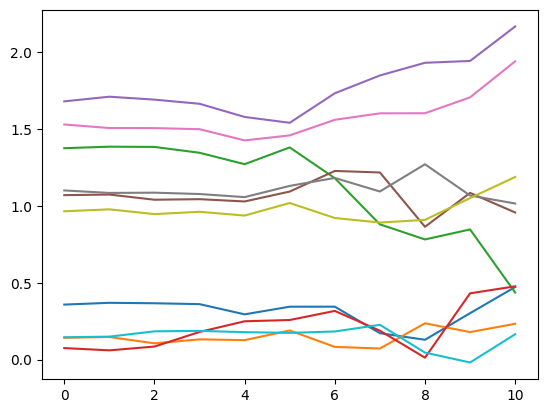

In [7]:
# Plot the evolution of features
for feature in all_xs_concat:
    feature_evolution = feature.detach().cpu().numpy()
    plt.plot(feature_evolution)
plt.show()

# Plot the evolution of edge attributes
for attribute in all_attrs_concat:
    attribute_evolution = attribute.detach().cpu().numpy()
    plt.plot(attribute_evolution)
plt.show()

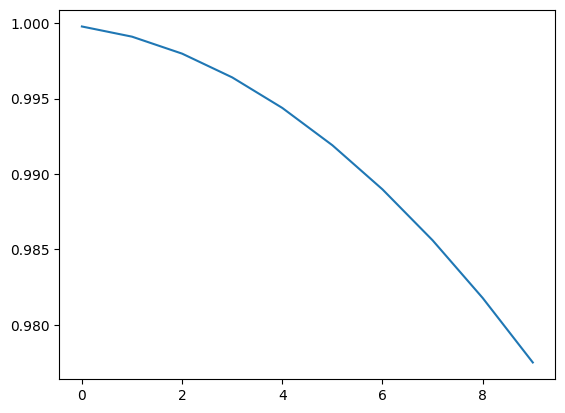

In [8]:
# Plot alpha_t parameter
alphas = GML.get_alpha_t(np.arange(1, n_t_steps+1), n_t_steps, s=alpha_decay)
plt.plot(alphas)